In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fitriadess","key":"26d7044dd51c856027a88ec7be0ea0ce"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d codebreaker619/hepatitis-data/

  0% 0.00/2.55k [00:00<?, ?B/s]
100% 2.55k/2.55k [00:00<00:00, 4.86MB/s]


In [5]:
!mkdir hepatitis-data
!unzip hepatitis-data.zip -d hepatitis-data
!ls hepatitis-data

Archive:  hepatitis-data.zip
  inflating: hepatitis-data/hepatitis_csv.csv  
hepatitis_csv.csv


In [6]:
df =  pd.read_csv('hepatitis-data/hepatitis_csv.csv')

In [7]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [9]:
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [10]:
cat_cols = df.select_dtypes(include = ['object', 'bool']).columns.to_list()
cat_cols

['sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'histology',
 'class']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

for i in cat_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [13]:
cat_cols = df.select_dtypes(include = ['object', 'bool']).columns.to_list()
cat_cols

[]

In [14]:
df.dtypes

age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
class                int64
dtype: object

In [15]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,0,1


In [16]:
df.isna().any()

age                False
sex                False
steroid            False
antivirals         False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
bilirubin           True
alk_phosphate       True
sgot                True
albumin             True
protime             True
histology          False
class              False
dtype: bool

In [17]:
df.isna().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           0
liver_firm          0
spleen_palpable     0
spiders             0
ascites             0
varices             0
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [18]:
df.fillna(df.mode(), inplace = True)

In [19]:
df.isna().any()

age                False
sex                False
steroid            False
antivirals         False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
bilirubin           True
alk_phosphate       True
sgot                True
albumin             True
protime             True
histology          False
class              False
dtype: bool

In [20]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,100.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,NaN,200.0,4.0,NaN,0,1


In [21]:
df.fillna(df.mean(), inplace = True)

In [22]:
df.isna().any()

age                False
sex                False
steroid            False
antivirals         False
fatigue            False
malaise            False
anorexia           False
liver_big          False
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
bilirubin          False
alk_phosphate      False
sgot               False
albumin            False
protime            False
histology          False
class              False
dtype: bool

In [23]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,100.000000,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,62.280899,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,62.280899,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,62.280899,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105.325397,242.0,3.3,50.000000,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.000000,142.0,4.3,62.280899,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.000000,20.0,4.1,62.280899,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.000000,19.0,4.1,48.000000,1,1


In [24]:
df.nunique()

age                49
sex                 2
steroid             3
antivirals          2
fatigue             3
malaise             3
anorexia            3
liver_big           3
liver_firm          3
spleen_palpable     3
spiders             3
ascites             3
varices             3
bilirubin          35
alk_phosphate      84
sgot               85
albumin            30
protime            45
histology           2
class               2
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<Axes: >

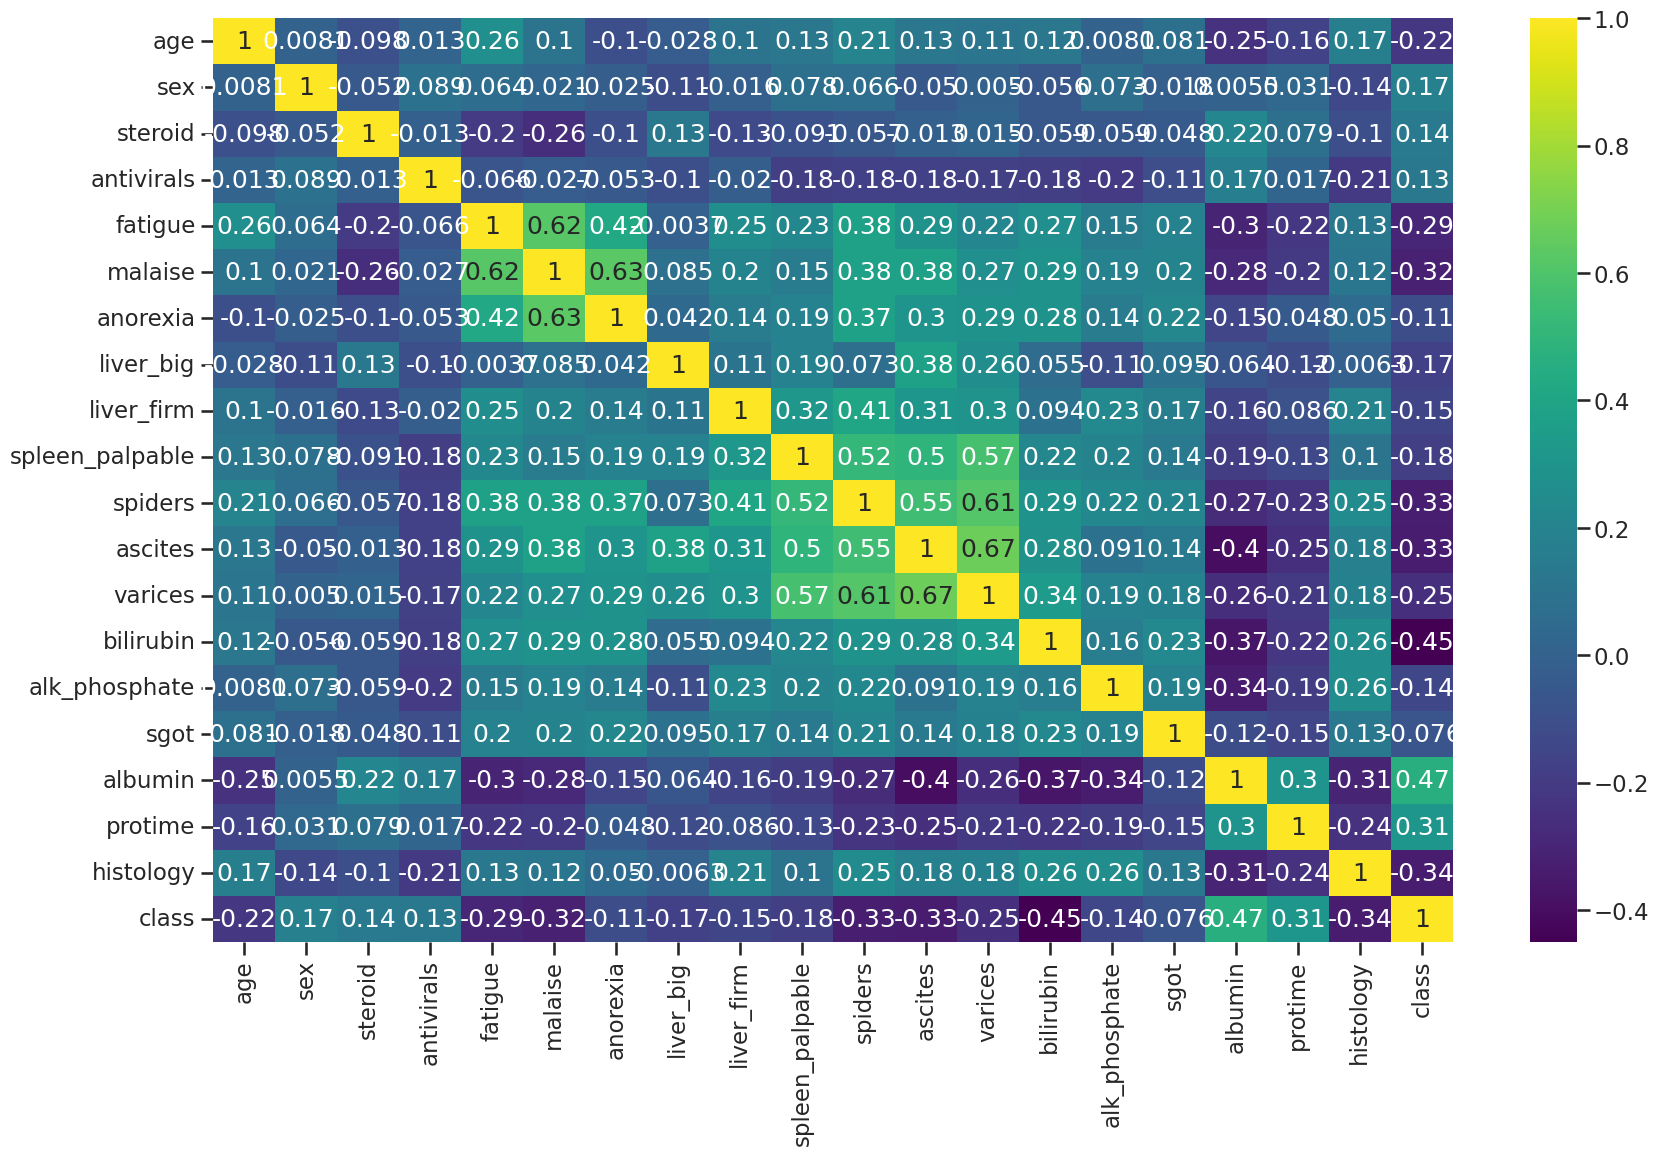

In [26]:
sns.set(style = "ticks", context = "talk")
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Figure size 2000x1000 with 0 Axes>

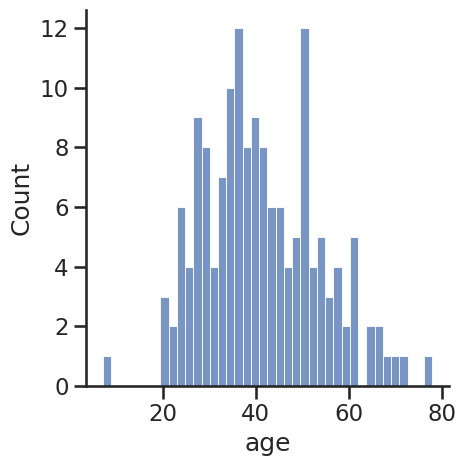

In [27]:
plt.figure(figsize=(20, 10))
sns.displot(df.age, bins=40)

<Axes: title={'center': 'Gender Distribution'}>

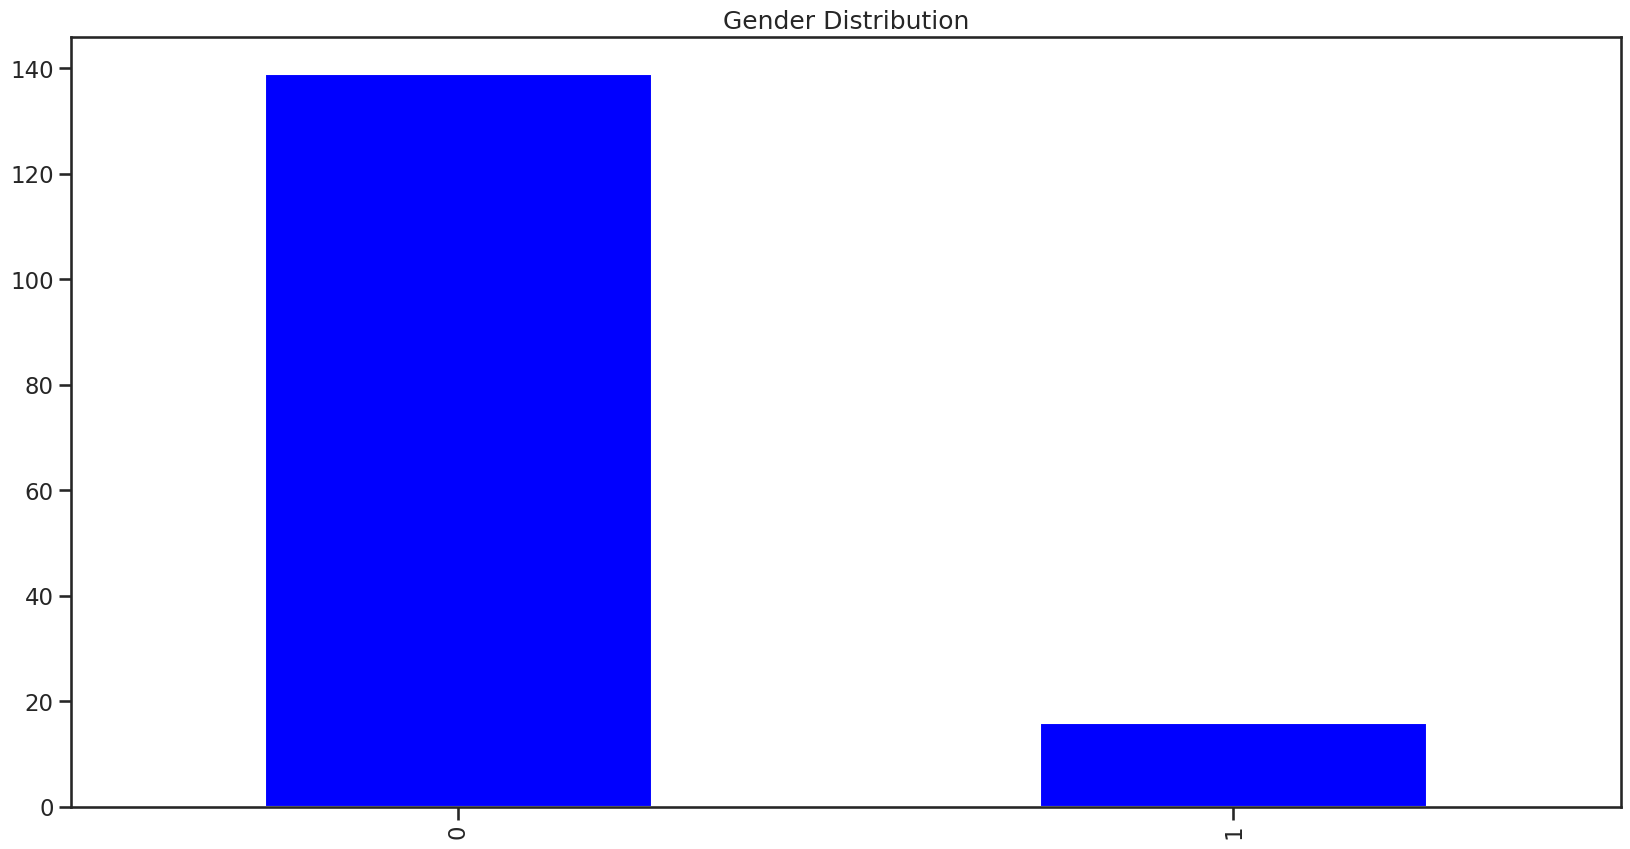

In [28]:
plt.figure(figsize=(20, 10))
df['sex'].value_counts().plot(kind="bar", color='blue', title='Gender Distribution')

In [29]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,100.000000,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,62.280899,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,62.280899,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,62.280899,0,1


In [30]:
df['class'].value_counts()

1    123
0     32
Name: class, dtype: int64

In [31]:
X = df.drop (columns='class', axis=1)
y = df['class']

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standarized_data = scaler.transform(X)

In [35]:
X = standarized_data
y = df['class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(155, 19) (108, 19) (47, 19)


In [38]:
classifier = svm.SVC(kernel='linear')

In [39]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [41]:
print('Tingkat akurasi data training = ', training_data_accuracy)

Tingkat akurasi data training =  0.9074074074074074


In [42]:
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [43]:
print('Tingkat akurasi data test = ', test_data_accuracy)

Tingkat akurasi data test =  0.8936170212765957


In [44]:
input_data_test = (30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,100.000000,0)

array = np.array(input_data_test)

reshape = array.reshape(1,-1)

std_data = scaler.transform(reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
    print('Rendah Resiko')
else :
    print('Resiko Tinggi')

[[-0.89419175  2.94745653 -1.00710629 -0.42802583 -1.34913081 -0.80623593
  -0.51117706 -1.94145069 -0.84594543 -0.51006137 -0.7147347  -0.41208169
  -0.39184799 -0.36093761 -0.43941439 -0.76983432  0.29724559  2.16692933
  -0.90748521]]
[1]
Rendah Resiko


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
import pickle
filename = 'resiko-hepatitis.sav'
pickle.dump(classifier,open(filename,'wb'))

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
